In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset using pandas.

In [4]:
#Load the dataset

data=pd.read_csv('Housing.csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
#Explore and clean the data. Handle missing values and outliers.
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [7]:
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

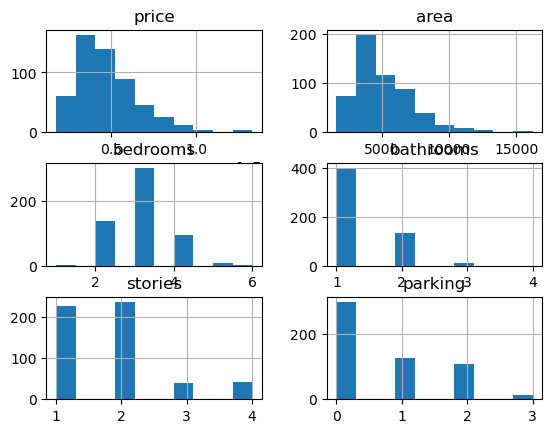

In [8]:
data.hist()


In [9]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [29]:
from sklearn.model_selection import train_test_split

X = data[['area']]  # Independent variable
y = data['price']  # Dependent variable

# Split the data into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [22]:
data.shape

(545, 13)

In [23]:
X_train.shape

(436, 1)

In [24]:
X_train

,area
46,6000
93,7200
335,3816
412,2610
471,3750
...,...
71,6000
106,5450
270,4500
435,4040


In [25]:
X_test

,area
316,5900
77,6500
360,4040
90,5000
493,3960
...,...
15,6000
357,6930
39,6000
54,6000


# 2 Create a simple linear regression model

In [26]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model with training data
model.fit(X_train, y_train)


LinearRegression()

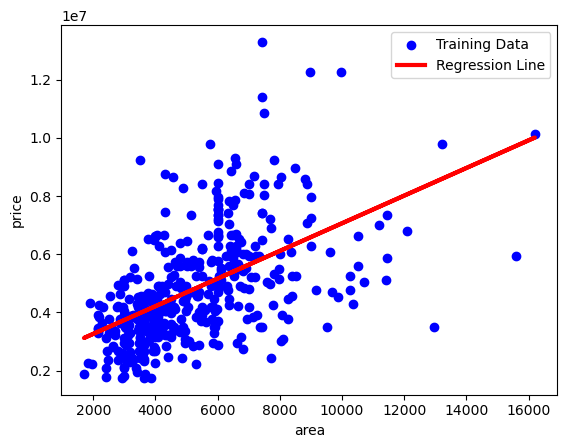

In [18]:
import matplotlib.pyplot as plt

# Visualize the data points
plt.scatter(X_train, y_train, color='blue', label='Training Data')

# Plot the regression line
plt.plot(X_train, model.predict(X_train), color='red', linewidth=3, label='Regression Line')

plt.xlabel('area')
plt.ylabel('price')
plt.legend()
plt.show()


# 3 Evaluate the Simple Linear Regression Model

In [30]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r_squared = r2_score(y_test, y_pred)


In [32]:
print(r_squared)

0.22672575879210743


# 4. Implement Multiple Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression

# Select multiple independent variables
X1 = data[['area', 'bedrooms', 'bathrooms']]  # You can add more features as needed
y1= data['price']
# Split the data into training and testing sets (as done in Step 1c)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Create a linear regression model
model_multiple = LinearRegression()

# Fit the model with training data
model_multiple.fit(X1_train, y1_train)



LinearRegression()

# 5.Evaluate the Multiple Linear Regression Model

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y1_pred_multiple = model_multiple.predict(X1_test)

mae = mean_absolute_error(y1_test, y1_pred_multiple)
mse = mean_squared_error(y1_test, y1_pred_multiple)
rmse = (mse ** 0.5)


In [42]:
mae

1265275.6699454375

In [43]:
mse

2750040479309.0513

In [44]:
rmse

1658324.6001036863

# 6: Model Comparison

In [46]:
from sklearn.linear_model import LinearRegression

# Create and train the Simple Linear Regression model
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)

multiple_model = LinearRegression()
multiple_model.fit(X1_train, y1_train)

# Make predictions using the simple linear regression model
y_pred_simple = simple_model.predict(X_test)
y_pred_multiple = multiple_model.predict(X1_test)

from sklearn.metrics import mean_squared_error

# Calculate MSE for simple linear regression
mse_simple = mean_squared_error(y_test, y_pred_simple)

# Calculate MSE for multiple linear regression
mse_multiple = mean_squared_error(y1_test, y1_pred_multiple)

print("MSE for Simple Linear Regression:", mse_simple)
print("MSE for Multiple Linear Regression:", mse_multiple)

MSE for Simple Linear Regression: 2750040479309.0513
MSE for Multiple Linear Regression: 2750040479309.0513
